# Sampling with Geometric Distribution

Recall that, in general, the geometric distribution has the following pdf:

- $n$ is the index of the first success,
- $p$ is the probability of success, and
- $q=1-p$ indicates the probability of failure.

The probability of the first success occuring on the $n^{th}$ trial is given by:

$$P(n) = (q)^{n-1}p$$

The expected value of the geometric distribution is given by:

$$E(X) = \frac{1}{p}$$

## Example: How Many Dice Rolls to Get 10 or More

Suppose we are rolling two, 6-sided dice and summing the values shown in a standard Monopoly dice roll. How many trials $n$ on average are required before a success occurs?

### Probability of Success

Let's note that, of the 36 possible outcomes, 3 are 10's, 2 are 11's and 1 is 12. Thus, the probability of success on one dice roll is given by:

$$p = \frac{6}{36} = \frac{1}{6}$$

### The rflip() Function

We need to be able to use **rflip()** function, so we load that code below.

In [1]:
rflip <- function(n=1, prob=.5, quiet=FALSE, verbose = !quiet, summarize = FALSE, 
                  summarise = summarize) {
	if ( ( prob > 1 && is.integer(prob) ) ) {  
		# swap n and prob
		temp <- prob
		prob <- n
		n <- temp
	}
	if (summarise) {
	  heads <- rbinom(1, n, prob)
	  return(data.frame(n = n, heads = heads, tails = n - heads, prob = prob))
	} else {
	  r <- rbinom(n,1,prob)
	  result <- c('T','H')[ 1 + r ]
	  heads <- sum(r)
	  attr(heads,"n") <- n
	  attr(heads,"prob") <- prob 
	  attr(heads,"sequence") <- result
	  attr(heads,"verbose") <- verbose
	  class(heads) <- 'cointoss'
	  return(heads)
	}
}

### Relationship to Negative Binomial

The fact the geometric distribution is a sub-case of the negative binomial distribution where $k=1$ can help us here. We can use the **while loop** created in the previous section.

### Expected Value

For the geometric distribution, the expected value is as follows:

$$E(X) = \frac{1}{p}$$

Thus, for this example:

$$E(X) = \frac{1}{\frac{1}{4}} = 4$$

The grand mean of the number of trials needed to achieve success is equal to
    4.05

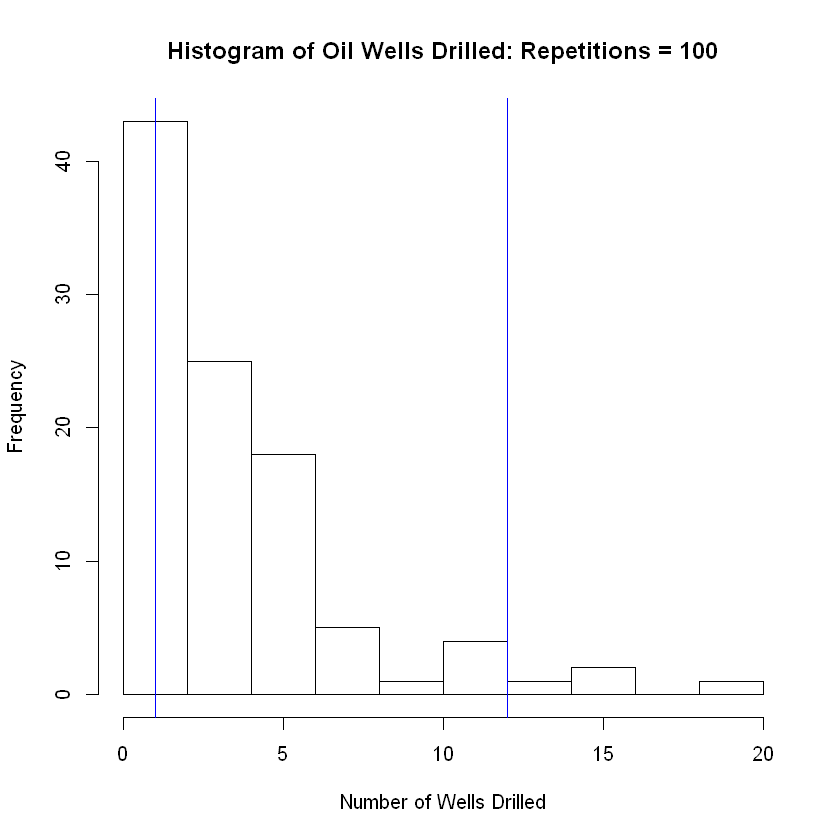

In [3]:
num_trials_needed <- c()     # create a vector to store the number of trials needed in while loop
num_samps = 100              # set the number of times to run the simulation

for (i in 1:num_samps){
   k <- 0     # Initialize successes to zero
   n <- 0     # Initialize number of total trials needed for success to occur
   while (k < 1 && n < 20) {
      k <- k + rflip(1, prob = 1/4, summarize = TRUE)[1,2]
      n <- n + 1
    }
   num_trials_needed[i] <- n     # store the number of trials need in this simulation
}

lower <- quantile(num_trials_needed, prob = 0.05)     # Calcuate the 5th percentile.
upper <- quantile(num_trials_needed, prob = 0.95)     # Calcuate the 95th percentile.
cat('The grand mean of the number of trials needed to achieve success is equal to\n   ',mean(num_trials_needed) )
hist(num_trials_needed, breaks = 8, main = 'Histogram of Oil Wells Drilled: Repetitions = 100', xlab = 'Number of Wells Drilled')
abline( v = lower, col="blue")     # Add vertical line at 5th percentile
abline(v = upper, col="blue")      # Add vertical line at 95th percentile 

This table summarizes the investigation to include five examples from the sampling distribution of Drawing a Spades hand:

<table class="center" style="width:70%; text-align:center;">
  <tr>
    <th>Max Number of Wells Drilled</th>
    <th>p = 1/4</th> 
    <th>E(X)</th>
    <th>Simulation Grand Mean</th>
  </tr>
  <tr>
    <td>100</td>
    <td>0.25</td>
    <td>4</td>
    <td>4.05</td>
  </tr>
  <tr>
    <td>200</td>
    <td>0.25</td>
    <td>4</td>
    <td>3.92</td>
  </tr>
  <tr>
    <td>500</td>
    <td>0.25</td>
    <td>4</td>
    <td>4.28</td>
  </tr>
  <tr>
    <td>1,000</td>
    <td>0.25</td>
    <td>4</td>
    <td>3.857</td>
  </tr>
  <tr>

The grand mean of the number of trials needed to achieve success is equal to
    3.92

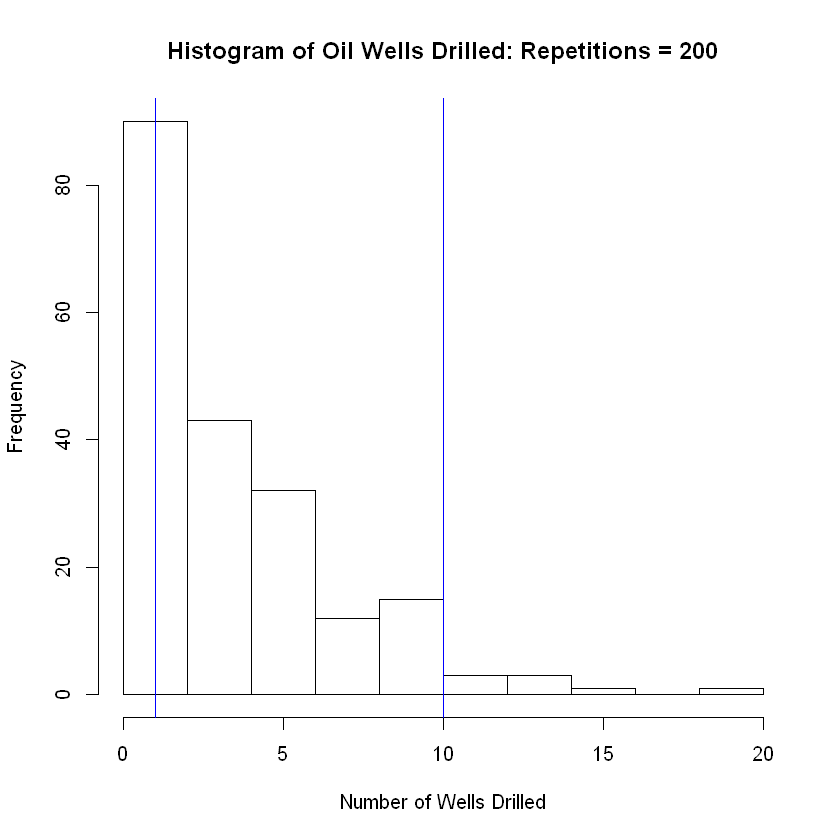

In [3]:
num_trials_needed <- c()     # create a vector to store the number of trials needed in while loop
num_samps = 200              # set the number of times to run the simulation

for (i in 1:num_samps){
   k <- 0     # Initialize successes to zero
   n <- 0     # Initialize number of total trials needed for success to occur
   while (k < 1 && n < 20) {
      k <- k + rflip(1, prob = 1/4, summarize = TRUE)[1,2]
      n <- n + 1
    }
   num_trials_needed[i] <- n     # store the number of trials need in this simulation
}

lower <- quantile(num_trials_needed, prob = 0.05)     # Calcuate the 5th percentile.
upper <- quantile(num_trials_needed, prob = 0.95)     # Calcuate the 95th percentile.
cat('The grand mean of the number of trials needed to achieve success is equal to\n   ',mean(num_trials_needed) )
hist(num_trials_needed, breaks = 8, main = 'Histogram of Oil Wells Drilled: Repetitions = 200', xlab = 'Number of Wells Drilled')
abline( v = lower, col="blue")     # Add vertical line at 5th percentile
abline(v = upper, col="blue")      # Add vertical line at 95th percentile 

The grand mean of the number of trials needed to achieve success is equal to
    4.28

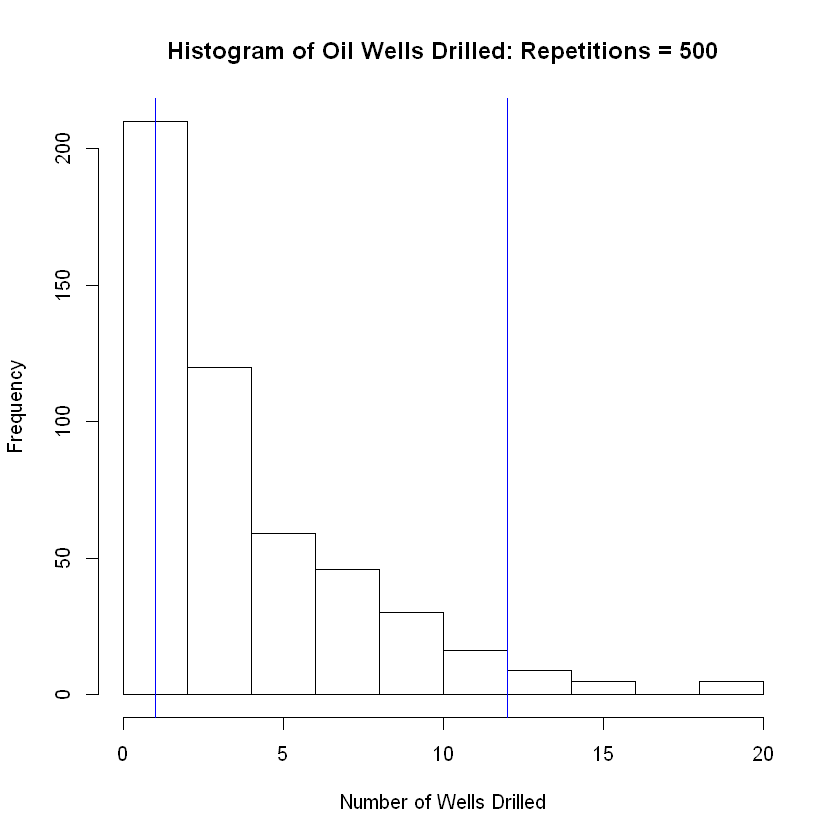

In [4]:
num_trials_needed <- c()     # create a vector to store the number of trials needed in while loop
num_samps = 500              # set the number of times to run the simulation

for (i in 1:num_samps){
   k <- 0     # Initialize successes to zero
   n <- 0     # Initialize number of total trials needed for success to occur
   while (k < 1 && n < 20) {
      k <- k + rflip(1, prob = 1/4, summarize = TRUE)[1,2]
      n <- n + 1
    }
   num_trials_needed[i] <- n     # store the number of trials need in this simulation
}

lower <- quantile(num_trials_needed, prob = 0.05)     # Calcuate the 5th percentile.
upper <- quantile(num_trials_needed, prob = 0.95)     # Calcuate the 95th percentile.
cat('The grand mean of the number of trials needed to achieve success is equal to\n   ',mean(num_trials_needed) )
hist(num_trials_needed, breaks = 8, main = 'Histogram of Oil Wells Drilled: Repetitions = 500', xlab = 'Number of Wells Drilled')
abline( v = lower, col="blue")     # Add vertical line at 5th percentile
abline(v = upper, col="blue")      # Add vertical line at 95th percentile 

The grand mean of the number of trials needed to achieve success is equal to
    3.857

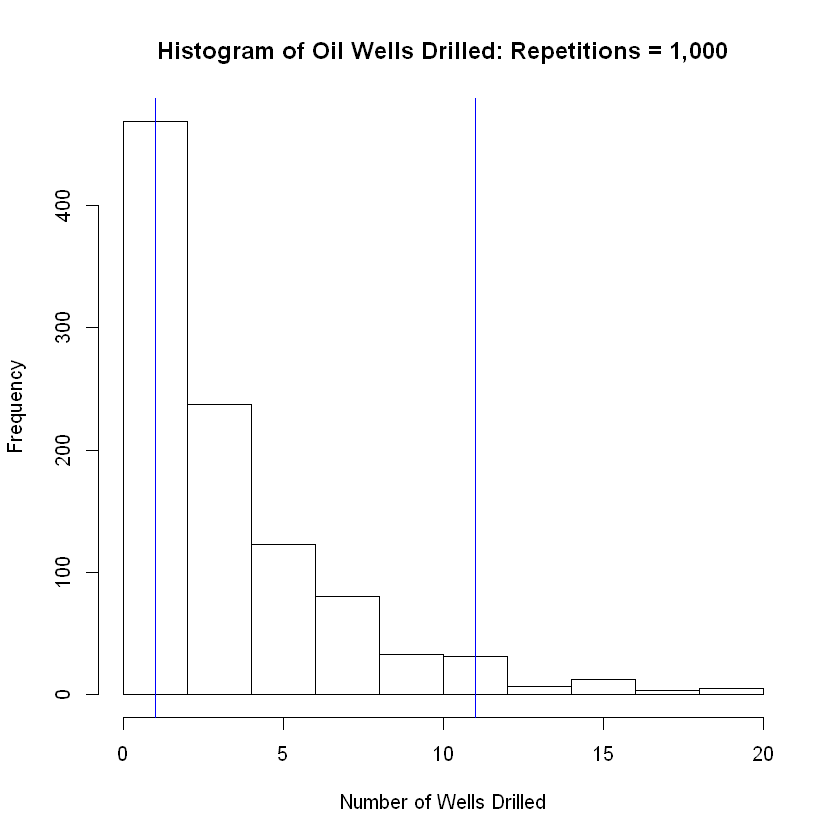

In [5]:
num_trials_needed <- c()     # create a vector to store the number of trials needed in while loop
num_samps = 1000              # set the number of times to run the simulation

for (i in 1:num_samps){
   k <- 0     # Initialize successes to zero
   n <- 0     # Initialize number of total trials needed for success to occur
   while (k < 1 && n < 20) {
      k <- k + rflip(1, prob = 1/4, summarize = TRUE)[1,2]
      n <- n + 1
    }
   num_trials_needed[i] <- n     # store the number of trials need in this simulation
}

lower <- quantile(num_trials_needed, prob = 0.05)     # Calcuate the 5th percentile.
upper <- quantile(num_trials_needed, prob = 0.95)     # Calcuate the 95th percentile.
cat('The grand mean of the number of trials needed to achieve success is equal to\n   ',mean(num_trials_needed) )
hist(num_trials_needed, breaks = 8, main = 'Histogram of Oil Wells Drilled: Repetitions = 1,000', xlab = 'Number of Wells Drilled')
abline( v = lower, col="blue")     # Add vertical line at 5th percentile
abline(v = upper, col="blue")      # Add vertical line at 95th percentile 